In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sqlalchemy import create_engine

db_path = os.path.abspath(os.path.join("..", "databases", "perovskites_data.db"))
engine = create_engine("sqlite:///" + db_path, echo=False)

df_perovskites = pd.read_sql("SELECT * FROM perovskites_data", con=engine)
df_experiment = pd.read_sql("SELECT * FROM experiment_data", con=engine)

In [4]:
df_experiment

,index,Cell_stack_sequence,Cell_area_total,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_flexible_min_bending_radius,Cell_semitransparent,Cell_semitransparent_AVT,...,Outdoor_link_spectral_data,Outdoor_irradiance_measured,Outdoor_link_irradiance_data,Tolerance factor,TS80,Atemperature,Ahumidity,Alight,TS80m,Unnamed: 0
0,0,SLG | ITO | PEDOT:PSS | Perovskite | PCBM-70 |...,NaN,0.06,0,pin,0,None,0,None,...,None,0,None,0.911521,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SLG | ITO | PEDOT:PSS | Perovskite | PCBM-70 |...,NaN,0.06,0,pin,0,None,0,None,...,None,0,None,0.911521,NaN,NaN,NaN,NaN,NaN,NaN
2,2,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.04,0,nip,0,None,0,None,...,None,0,None,0.911521,220.0,0.855491,1.7,0.199526,63.839170,NaN
3,3,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.04,0,nip,0,None,0,None,...,None,0,None,0.911521,350.0,0.855491,1.7,0.199526,101.562315,NaN
4,4,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.06,0,nip,0,None,0,None,...,None,0,None,0.968626,200.0,0.855491,2.0,1.000000,342.196543,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49857,49857,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.20,0,nip,0,None,0,None,...,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,42438.0
49858,49858,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Cu...,NaN,0.25,0,nip,0,None,0,None,...,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,42439.0
49859,49859,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.15,0,nip,0,None,0,None,...,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,42440.0
49860,49860,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.12,0,nip,0,None,0,None,...,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,42441.0


### We will predict T80 - the time it took for that specific solar cell's efficiency to fall to 80% of its initial value (e.g., 500 hours, 1200 hours, 850 hours).

In [5]:
# drop na TS80
nan_mask = df_experiment["Stability_PCE_T80"].isna()
print(f"NaN count in T80 - {nan_mask.sum()}")
df = df_experiment[~nan_mask]
df

NaN count in T80 - 46194


,index,Cell_stack_sequence,Cell_area_total,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_flexible_min_bending_radius,Cell_semitransparent,Cell_semitransparent_AVT,...,Outdoor_link_spectral_data,Outdoor_irradiance_measured,Outdoor_link_irradiance_data,Tolerance factor,TS80,Atemperature,Ahumidity,Alight,TS80m,Unnamed: 0
2,2,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.0400,0,nip,0,None,0,None,...,None,0,None,0.911521,220.0,0.855491,1.7,0.199526,63.839170,NaN
3,3,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.0400,0,nip,0,None,0,None,...,None,0,None,0.911521,350.0,0.855491,1.7,0.199526,101.562315,NaN
4,4,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.0600,0,nip,0,None,0,None,...,None,0,None,0.968626,200.0,0.855491,2.0,1.000000,342.196543,NaN
8,8,SLG | FTO | SnO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.1600,0,nip,0,None,0,None,...,None,0,None,0.970702,150.0,0.855491,2.0,1.000000,256.647407,NaN
10,10,SLG | FTO | LiMgNiO-c | Perovskite | PCBM-60 |...,NaN,1.0200,0,pin,0,None,0,None,...,None,0,None,0.911521,450.0,43.280500,2.5,0.199526,9715.039731,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49740,49740,SLG | ITO | Graphene oxide | Perovskite | PCBM...,0.09,0.0900,0,pin,0,None,0,None,...,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,42321.0
49741,49741,SLG | ITO | Graphene oxide | PTFTS | Perovskit...,0.09,0.0900,0,pin,0,None,0,None,...,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,42322.0
49811,49811,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | N2...,NaN,0.0400,0,nip,0,None,0,None,...,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,42392.0
49844,49844,SLG | ITO | MoO3 | PEDOT:PSS | Perovskite | PC...,NaN,0.1058,0,pin,0,None,0,None,...,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,42425.0


In [7]:
features_for_stability_model = [
    "Perovskite_composition_long_form",
    # --- Architecture & Structure Features ---
    'Cell_architecture',
    'ETL_stack_sequence',
    'HTL_stack_sequence',
    'Backcontact_stack_sequence',

    # --- Stability features ---
    "Stability_time_total_exposure",
    "Stability_temperature_range",
    "Stability_light_intensity",
    "Stability_protocol",
    "Stability_PCE_end_of_experiment",

    # --- Device & Test Condition Features ---
    'Cell_area_measured',
    'Encapsulation',

    # --- Target ---
    'Stability_PCE_T80'
]
df = df[features_for_stability_model]
df

,Perovskite_composition_long_form,Cell_architecture,ETL_stack_sequence,HTL_stack_sequence,Backcontact_stack_sequence,Stability_time_total_exposure,Stability_temperature_range,Stability_light_intensity,Stability_protocol,Stability_PCE_end_of_experiment,Cell_area_measured,Encapsulation,Stability_PCE_T80
2,MAPbI3,nip,TiO2-c,Spiro-MeOTAD,Au,480.0,25.0; 25.0,0.0,ISOS-D-1,61.0,0.0400,0,220.0
3,MAPbI3,nip,TiO2-c,Spiro-MeOTAD,Au,480.0,25.0; 25.0,0.0,ISOS-D-1,78.0,0.0400,0,350.0
4,Cs0.05FA0.788MA0.162PbBr0.51I2.49,nip,TiO2-c,Spiro-MeOTAD,Au,5.0,25.0; 25.0,100.0,ISOS-L-1,75.0,0.0600,0,200.0
8,Cs0.05FA0.827MA0.123PbBr0.369I2.631,nip,SnO2-c,Spiro-MeOTAD,Au,700.0,25.0; 25.0,100.0,ISOS-L-1,69.0,0.1600,0,150.0
10,MAPbI3,pin,PCBM-60 | Carbon-QDs,LiMgNiO,Ag,500.0,85.0; 85.0,0.0,ISOS-D-2,74.0,1.0200,0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49740,MAPbI3,pin,PCBM-60 | BCP,Graphene oxide,Au,500.0,25; 25,0.0,ISOS-D-1,78.0,0.0900,0,500.0
49741,MAPbI3,pin,PCBM-60 | BCP,Graphene oxide | PTFTS,Au,500.0,25; 25,0.0,ISOS-D-1,78.0,0.0900,0,500.0
49811,MAPbI3,nip,TiO2-c | TiO2-mp,"N2,N2,N12,N12-Tetrakis(4-methoxyphenyl)-9-meth...",Ag,72.0,35.0; 35.0,0.0,ISOS-D-1,80.0,0.0400,0,72.0
49844,BA2FA2.4MA0.6PMAPbI13,pin,PCBM-60 | BCP,MoO3 | PEDOT:PSS,Ag,40.0,85.0; 85.0,0.0,ISOS-D-2I,80.0,0.1058,0,40.0


In [8]:
# we will check some columns for NaN and unknown values
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3668 entries, 2 to 49855
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Perovskite_composition_long_form  3668 non-null   object 
 1   Cell_architecture                 3668 non-null   object 
 2   ETL_stack_sequence                3668 non-null   object 
 3   HTL_stack_sequence                3668 non-null   object 
 4   Backcontact_stack_sequence        3668 non-null   object 
 5   Stability_time_total_exposure     3668 non-null   float64
 6   Stability_temperature_range       3668 non-null   object 
 7   Stability_light_intensity         3574 non-null   float64
 8   Stability_protocol                3668 non-null   object 
 9   Stability_PCE_end_of_experiment   3642 non-null   float64
 10  Cell_area_measured                3580 non-null   float64
 11  Encapsulation                     3668 non-null   int64  
 12  Stability_

In [9]:
# drop cell area measured NaN
df = df.dropna(subset=["Cell_area_measured", "Stability_light_intensity", "Stability_PCE_end_of_experiment"])
print("DF length -", df.shape[0])

DF length - 3470


In [10]:
df = df.rename(
    columns={
        "Perovskite_composition_long_form": "composition_long_form",
    }
)
df_main = pd.merge(
    df, df_perovskites, how="right", on="composition_long_form"
)
df_main

,composition_long_form,Cell_architecture,ETL_stack_sequence,HTL_stack_sequence,Backcontact_stack_sequence,Stability_time_total_exposure,Stability_temperature_range,Stability_light_intensity,Stability_protocol,Stability_PCE_end_of_experiment,...,C_1_coef,C_2_coef,dimension,dimension_list_of_layers,r_A,r_B,r_C,tolerance_factor,octahedral_factor,space_group
0,MAPbI3,nip,TiO2-c,Spiro-MeOTAD,Au,480.0,25.0; 25.0,0.0,ISOS-D-1,61.0,...,3.00,NaN,3D,3.0,0.723333,0.396667,2.200,0.796062,0.180303,Pnma
1,MAPbI3,nip,TiO2-c,Spiro-MeOTAD,Au,480.0,25.0; 25.0,0.0,ISOS-D-1,78.0,...,3.00,NaN,3D,3.0,0.723333,0.396667,2.200,0.796062,0.180303,Pnma
2,MAPbI3,pin,PCBM-60 | Carbon-QDs,LiMgNiO,Ag,500.0,85.0; 85.0,0.0,ISOS-D-2,74.0,...,3.00,NaN,3D,3.0,0.723333,0.396667,2.200,0.796062,0.180303,Pnma
3,MAPbI3,pin,PCBM-60 | BCP,PEDOT:PSS,Al,7.2,25.0; 25.0,100.0,ISOS-L-1,3.0,...,3.00,NaN,3D,3.0,0.723333,0.396667,2.200,0.796062,0.180303,Pnma
4,MAPbI3,nip,TiO2-c,Spiro-MeOTAD,Au,1008.0,25.0; 25.0,0.0,ISOS-D-1,71.6,...,3.00,NaN,3D,3.0,0.723333,0.396667,2.200,0.796062,0.180303,Pnma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,MAPb1.0BrI2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,2.00,3D,3.0,0.723333,0.396667,2.120,0.798890,0.187107,Pnma
2266,MAPb1.0ClI2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,2.00,3D,3.0,0.723333,0.396667,2.070,0.800751,0.191626,I4/mcm
2267,FA0.3MA0.7PbBr0.45I2.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.45,2.55,3D,3.0,0.759333,0.396667,2.164,0.807254,0.183303,I4/mcm
2268,MAPb(Br0.7I0.3)xCl3-x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.10,0.90,3D,3.0,0.723333,0.396667,2.032,0.802216,0.195210,I4/mcm


In [12]:
df_main = df_main.dropna(
    subset=["Cell_architecture", "ETL_stack_sequence", "HTL_stack_sequence", "Backcontact_stack_sequence",
            "Cell_area_measured", "Encapsulation", "Stability_PCE_T80", ]
)

In [13]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2090 entries, 0 to 2129
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   composition_long_form            2090 non-null   object 
 1   Cell_architecture                2090 non-null   object 
 2   ETL_stack_sequence               2090 non-null   object 
 3   HTL_stack_sequence               2090 non-null   object 
 4   Backcontact_stack_sequence       2090 non-null   object 
 5   Stability_time_total_exposure    2090 non-null   float64
 6   Stability_temperature_range      2090 non-null   object 
 7   Stability_light_intensity        2090 non-null   float64
 8   Stability_protocol               2090 non-null   object 
 9   Stability_PCE_end_of_experiment  2090 non-null   float64
 10  Cell_area_measured               2090 non-null   float64
 11  Encapsulation                    2090 non-null   float64
 12  Stability_PCE_T80        

In [14]:
df_main = df_main.drop(columns=[col for col in df_main.columns if df_main[col].isna().all()])
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2090 entries, 0 to 2129
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   composition_long_form            2090 non-null   object 
 1   Cell_architecture                2090 non-null   object 
 2   ETL_stack_sequence               2090 non-null   object 
 3   HTL_stack_sequence               2090 non-null   object 
 4   Backcontact_stack_sequence       2090 non-null   object 
 5   Stability_time_total_exposure    2090 non-null   float64
 6   Stability_temperature_range      2090 non-null   object 
 7   Stability_light_intensity        2090 non-null   float64
 8   Stability_protocol               2090 non-null   object 
 9   Stability_PCE_end_of_experiment  2090 non-null   float64
 10  Cell_area_measured               2090 non-null   float64
 11  Encapsulation                    2090 non-null   float64
 12  Stability_PCE_T80        

In [15]:
df_main = df_main.rename(
    columns={
        "Cell_architecture": "cell_architecture",
        "Backcontact_stack_sequence": "backcontact_stack_sequence",
        "Stability_time_total_exposure": "stability_time_total_exposure",
        "Stability_temperature_range": "stability_temperature_range",
        "Stability_light_intensity": "stability_light_intensity",
        "Stability_protocol": "stability_protocol",
        "Stability_PCE_end_of_experiment": "PCE_initial",
        "Cell_area_measured": "cell_area_measured",
        "Encapsulation": "encapsulation",
        "Stability_PCE_T80": "PCE_T80"
    }
)

### Data analysis

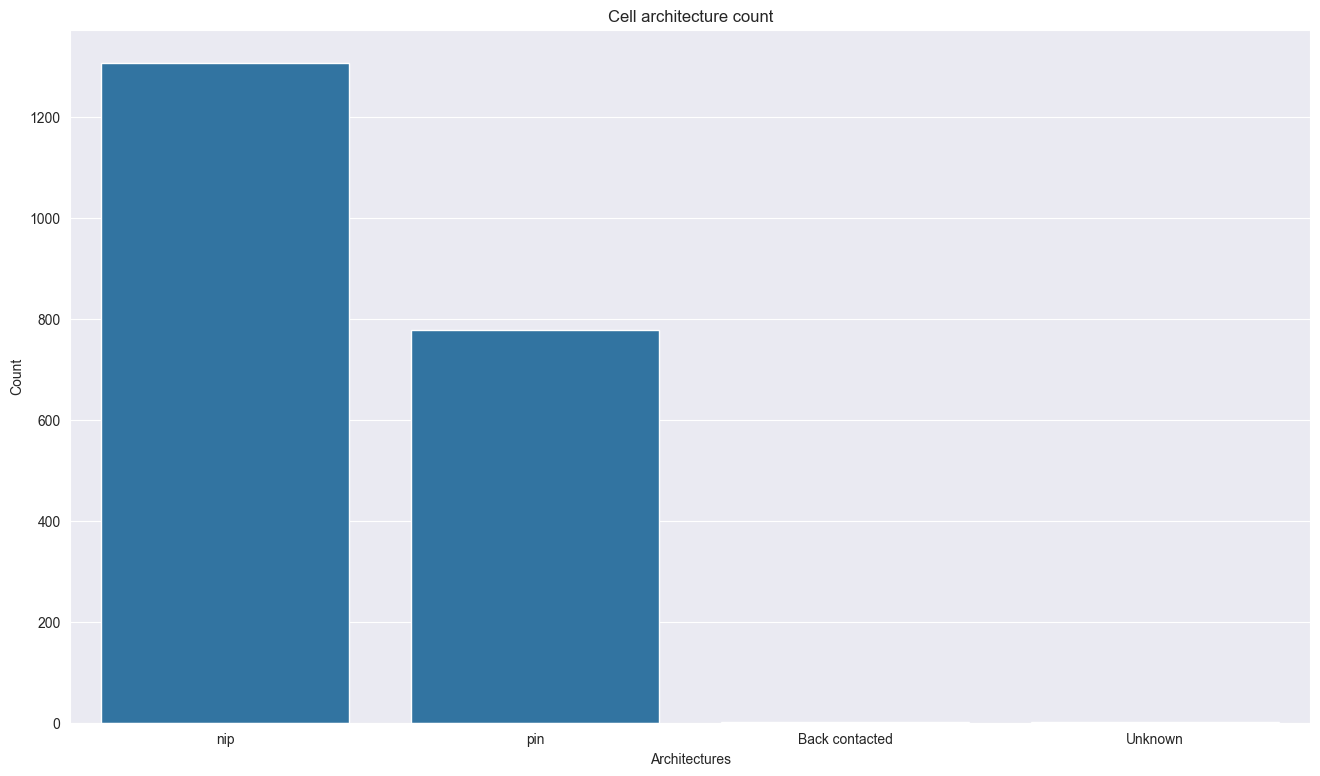

In [17]:
# check nip - pin architecture count
plt.figure(figsize=(16, 9))
architecture_value_counts = df_main["cell_architecture"].value_counts()
sns.barplot(x=architecture_value_counts.index, y=architecture_value_counts.values)
plt.title("Cell architecture count")
plt.xlabel("Architectures")
plt.ylabel("Count")
plt.show()

In [19]:
# remove back contacted
df_main = df_main[df_main["cell_architecture"].isin(["pin", "nip"])]

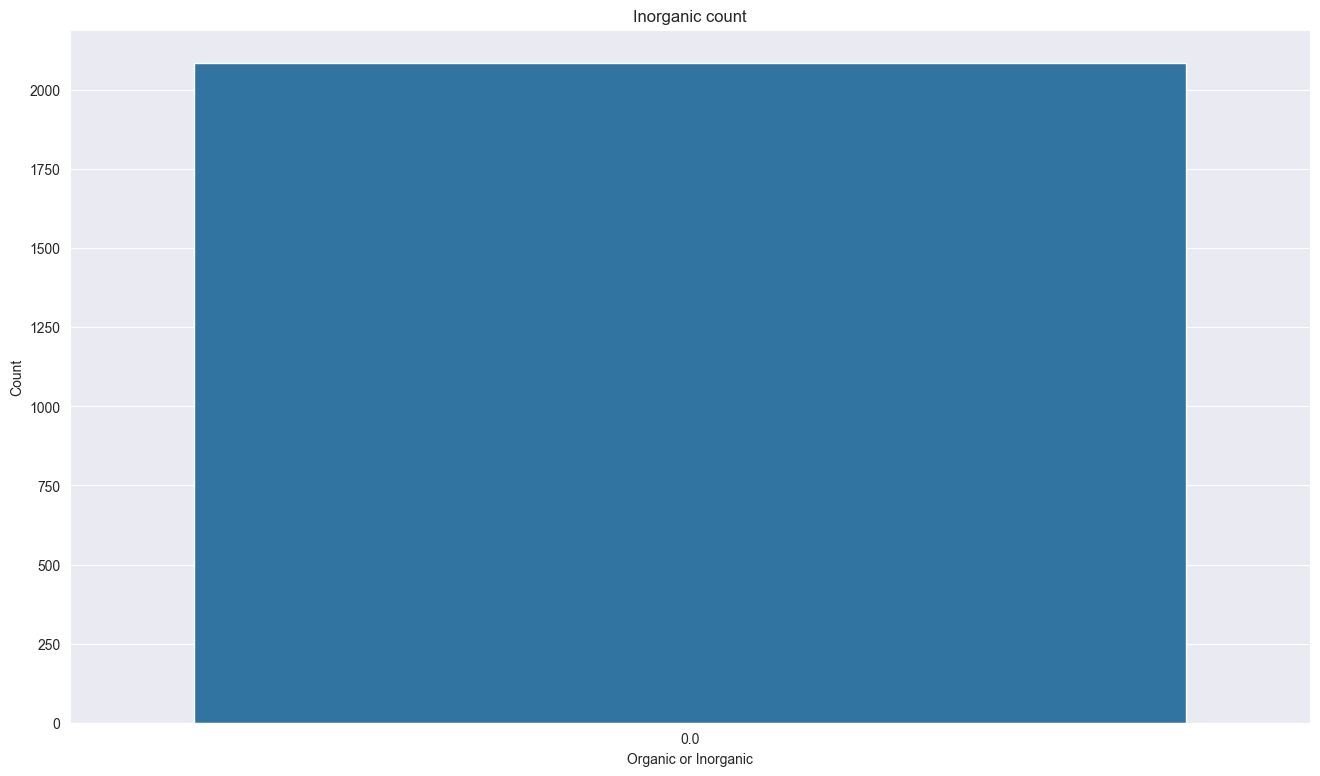

In [20]:
# check inorganic-organic
plt.figure(figsize=(16, 9))
inorganic_value_counts = df_main["composition_inorganic"].value_counts()
sns.barplot(x=inorganic_value_counts.index, y=inorganic_value_counts.values)
plt.title("Inorganic count")
plt.xlabel("Organic or Inorganic")
plt.ylabel("Count")
plt.show()

In [21]:
df_main = df_main.drop(columns=["composition_inorganic"])

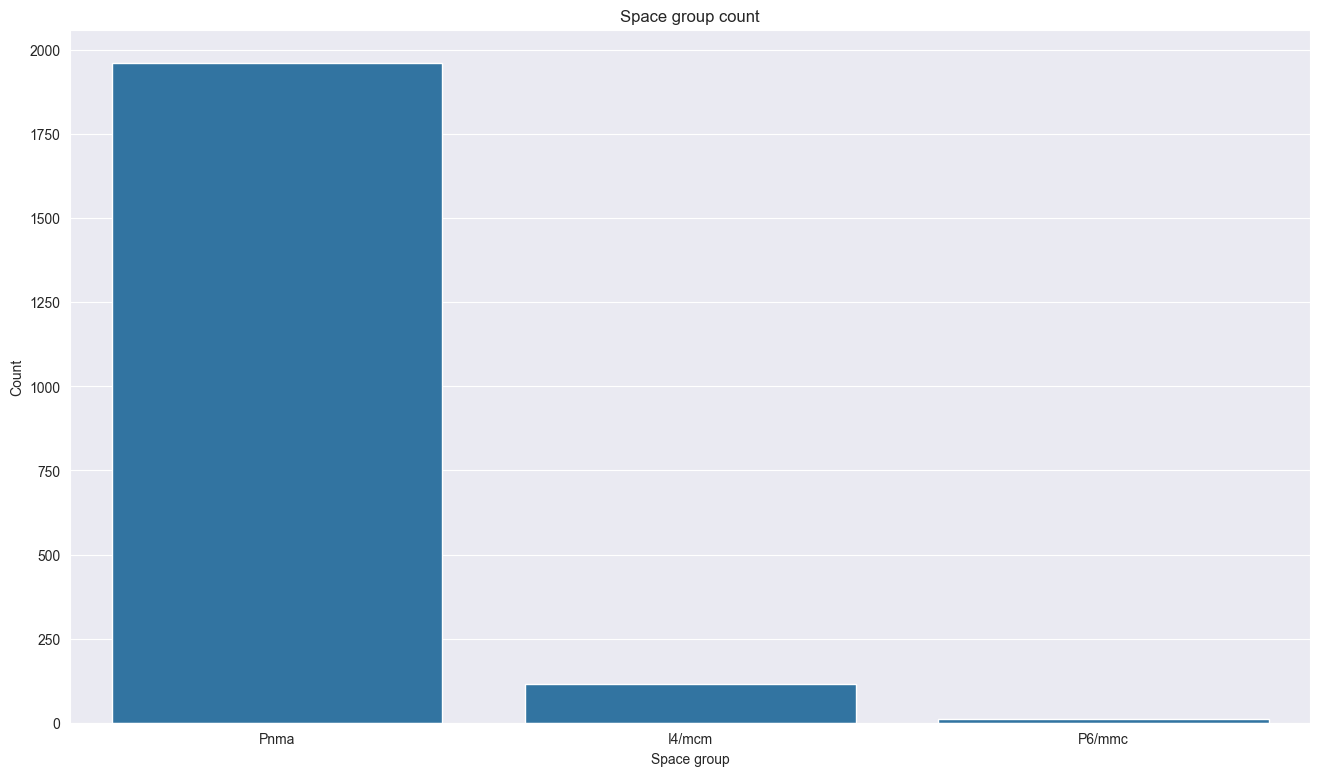

In [22]:
# check space groups
plt.figure(figsize=(16, 9))
space_group_value_counts = df_main["space_group"].value_counts()
sns.barplot(x=space_group_value_counts.index, y=space_group_value_counts.values)
plt.title("Space group count")
plt.xlabel("Space group")
plt.ylabel("Count")
plt.show()

In [23]:
df_main = df_main[df_main["space_group"] == "Pnma"]  # only cubic will remain
df_main = df_main.drop(columns=["space_group"])

In [24]:
 # filter
etl_stack_sequence_threshold = 200
df_main = df_main[
    df_main['ETL_stack_sequence'].map(df_main['ETL_stack_sequence'].value_counts()) >= etl_stack_sequence_threshold]
df_main

,composition_long_form,cell_architecture,ETL_stack_sequence,HTL_stack_sequence,backcontact_stack_sequence,stability_time_total_exposure,stability_temperature_range,stability_light_intensity,stability_protocol,PCE_initial,...,C_2,C_1_coef,C_2_coef,dimension,dimension_list_of_layers,r_A,r_B,r_C,tolerance_factor,octahedral_factor
0,MAPbI3,nip,TiO2-c,Spiro-MeOTAD,Au,480.0,25.0; 25.0,0.0,ISOS-D-1,61.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
1,MAPbI3,nip,TiO2-c,Spiro-MeOTAD,Au,480.0,25.0; 25.0,0.0,ISOS-D-1,78.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
4,MAPbI3,nip,TiO2-c,Spiro-MeOTAD,Au,1008.0,25.0; 25.0,0.0,ISOS-D-1,71.6,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
5,MAPbI3,nip,TiO2-c,Spiro-MeOTAD,Au,1008.0,25.0; 25.0,0.0,ISOS-D-1,60.4,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
6,MAPbI3,nip,TiO2-c | TiO2-mp,Spiro-MeOTAD,Au,168.0,25.0; 25.0,0.0,ISOS-D-1,50.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,MAPb1.0I3,nip,TiO2-c,Spiro-MeOTAD,Au,60.0,70.0; 70.0,100.0,ISOS-L-1,60.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
2119,MAPb1.0I3,nip,TiO2-c | TiO2-mp,Spiro-MeOTAD,Au,300.0,45.0; 45.0,100.0,ISOS-L-1I,50.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
2120,MAPb1.0I3,pin,PCBM-60,NiO,Ag,200.0,25.0; 25.0,0.0,ISOS-D-1,20.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
2121,MAPb1.0I3,pin,PCBM-60,NiO,Ag,200.0,25.0; 25.0,0.0,ISOS-D-1,30.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303


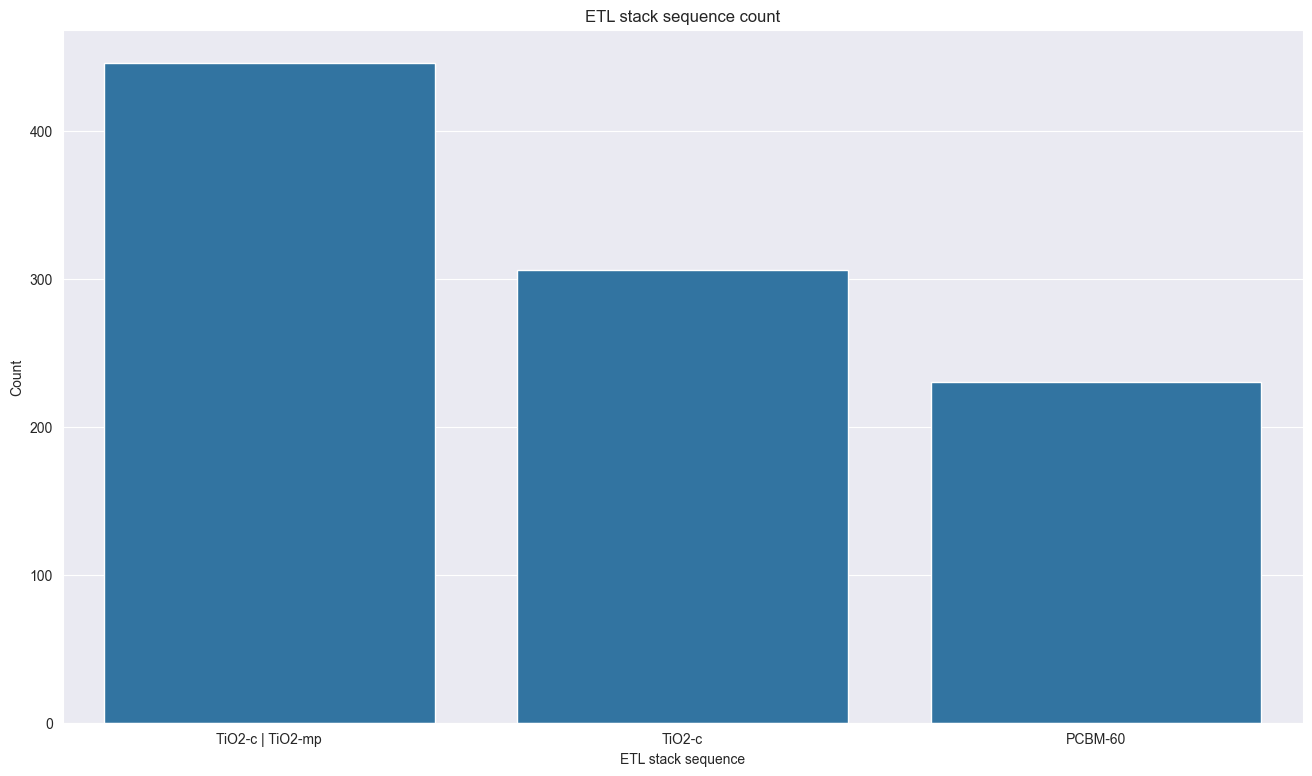

In [25]:
plt.figure(figsize=(16, 9))
etl_stack_sequence_counts = df_main["ETL_stack_sequence"].value_counts()
sns.barplot(x=etl_stack_sequence_counts.index, y=etl_stack_sequence_counts.values)
plt.title("ETL stack sequence count")
plt.xlabel("ETL stack sequence")
plt.ylabel("Count")
plt.show()

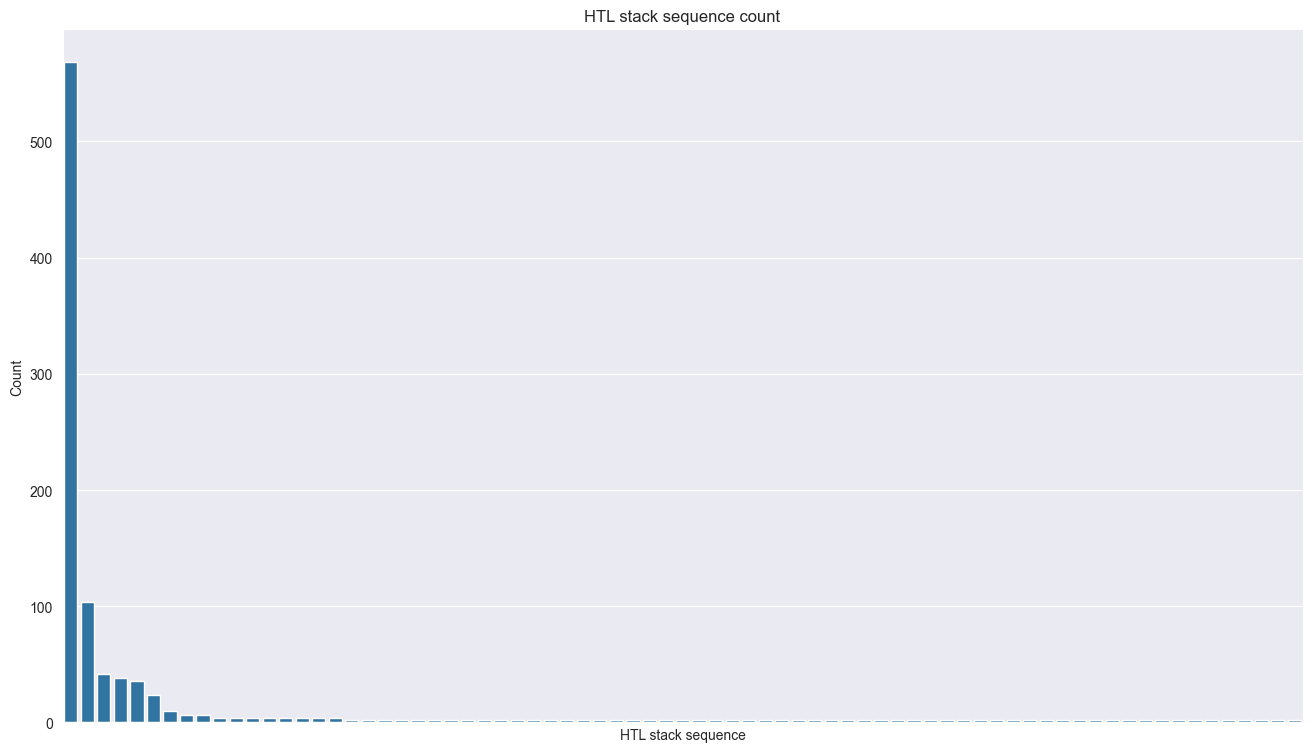

In [26]:
plt.figure(figsize=(16, 9))
htl_stack_sequence_counts = df_main["HTL_stack_sequence"].value_counts()
sns.barplot(x=htl_stack_sequence_counts.index, y=htl_stack_sequence_counts.values)
plt.title("HTL stack sequence count")
plt.xlabel("HTL stack sequence")
plt.xticks(ticks=[])
plt.ylabel("Count")
plt.show()

In [27]:
 # filter
htl_stack_sequence_threshold = 200
df_main = df_main[
    df_main['HTL_stack_sequence'].map(df_main['HTL_stack_sequence'].value_counts()) >= etl_stack_sequence_threshold]
df_main

,composition_long_form,cell_architecture,ETL_stack_sequence,HTL_stack_sequence,backcontact_stack_sequence,stability_time_total_exposure,stability_temperature_range,stability_light_intensity,stability_protocol,PCE_initial,...,C_2,C_1_coef,C_2_coef,dimension,dimension_list_of_layers,r_A,r_B,r_C,tolerance_factor,octahedral_factor
0,MAPbI3,nip,TiO2-c,Spiro-MeOTAD,Au,480.0,25.0; 25.0,0.0,ISOS-D-1,61.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
1,MAPbI3,nip,TiO2-c,Spiro-MeOTAD,Au,480.0,25.0; 25.0,0.0,ISOS-D-1,78.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
4,MAPbI3,nip,TiO2-c,Spiro-MeOTAD,Au,1008.0,25.0; 25.0,0.0,ISOS-D-1,71.6,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
5,MAPbI3,nip,TiO2-c,Spiro-MeOTAD,Au,1008.0,25.0; 25.0,0.0,ISOS-D-1,60.4,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
6,MAPbI3,nip,TiO2-c | TiO2-mp,Spiro-MeOTAD,Au,168.0,25.0; 25.0,0.0,ISOS-D-1,50.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,MAPb1.0I3,nip,TiO2-c,Spiro-MeOTAD,Au,60.0,25.0; 25.0,100.0,ISOS-L-1,30.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
2116,MAPb1.0I3,nip,TiO2-c,Spiro-MeOTAD,Au,120.0,25.0; 25.0,100.0,ISOS-L-1,60.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
2117,MAPb1.0I3,nip,TiO2-c,Spiro-MeOTAD,Au,60.0,50.0; 50.0,100.0,ISOS-L-1,60.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
2118,MAPb1.0I3,nip,TiO2-c,Spiro-MeOTAD,Au,60.0,70.0; 70.0,100.0,ISOS-L-1,60.0,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303


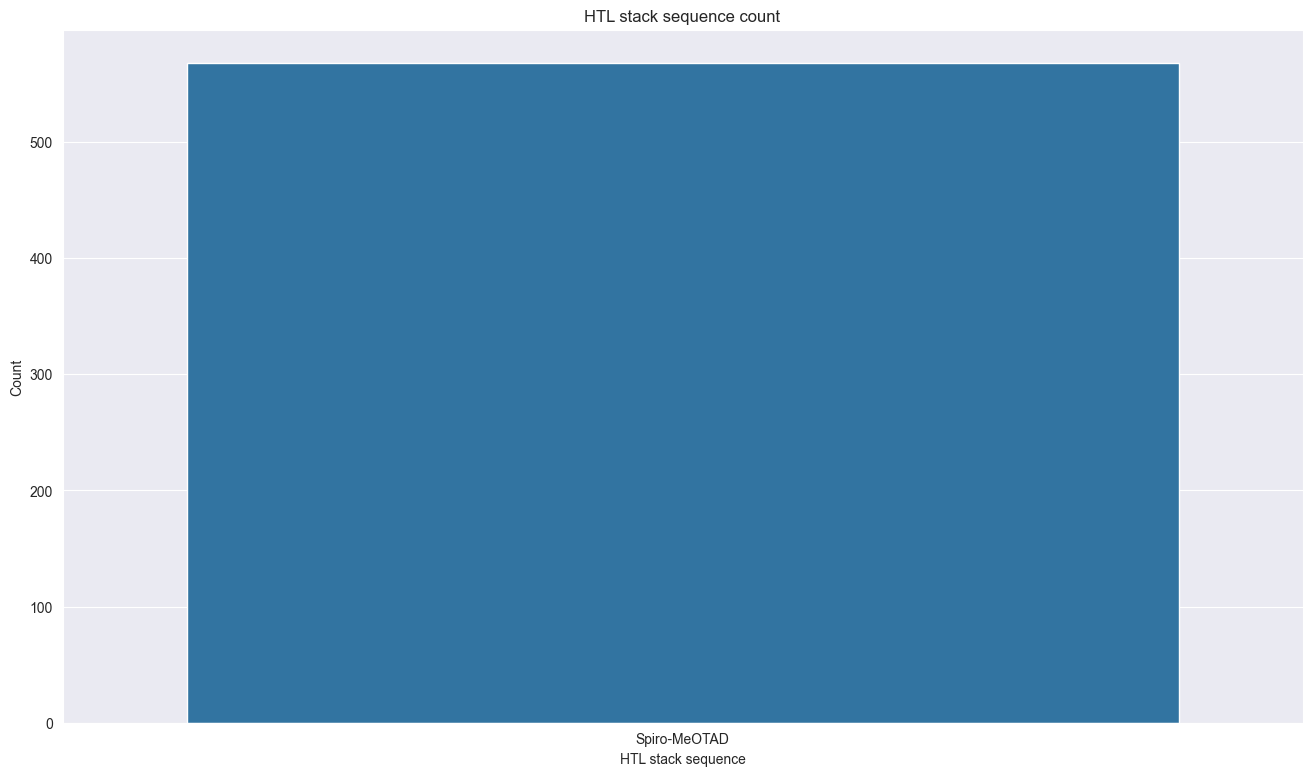

In [28]:
plt.figure(figsize=(16, 9))
htl_stack_sequence_counts = df_main["HTL_stack_sequence"].value_counts()
sns.barplot(x=htl_stack_sequence_counts.index, y=htl_stack_sequence_counts.values)
plt.title("HTL stack sequence count")
plt.xlabel("HTL stack sequence")
plt.ylabel("Count")
plt.show()

In [29]:
df_main = df_main.drop(columns=["HTL_stack_sequence"])

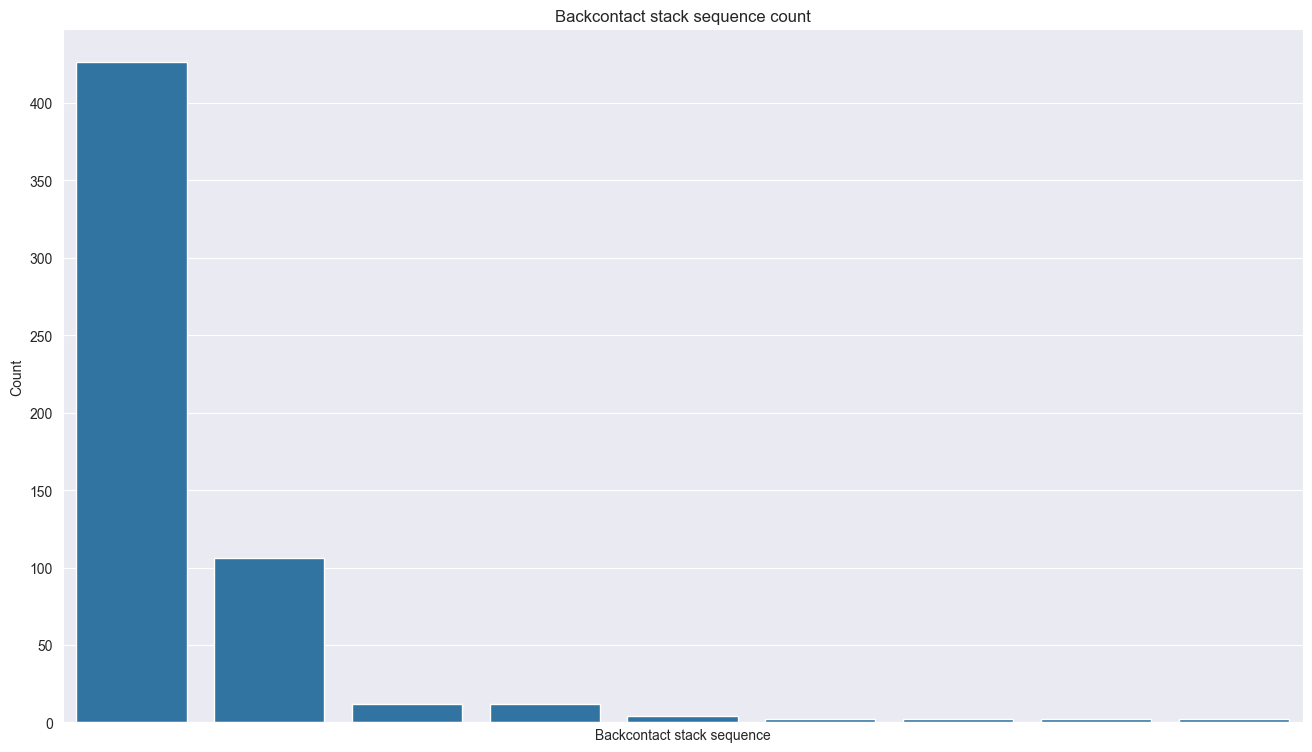

In [31]:
# check backcontact
plt.figure(figsize=(16, 9))
backcontact_counts = df_main["backcontact_stack_sequence"].value_counts()
sns.barplot(x=backcontact_counts.index, y=backcontact_counts.values)
plt.xticks(ticks=[])
plt.title("Backcontact stack sequence count")
plt.xlabel("Backcontact stack sequence")
plt.ylabel("Count")
plt.show()

In [32]:
backcontact_counts

backcontact_stack_sequence
Au                      426
Ag                      106
MoO3 | Ag                12
MoO3 | Ag | MoO3         12
AgAl                      4
AV-Carbon; MAI            2
PEDOT:PSS | Graphene      2
Ni-grid                   2
Carbon                    2
Name: count, dtype: int64

In [34]:
values_to_keep = ["Au", "Ag"]
df_main = df_main[df_main["backcontact_stack_sequence"].str.strip().isin(values_to_keep)]

In [35]:
df_main

,composition_long_form,cell_architecture,ETL_stack_sequence,backcontact_stack_sequence,stability_time_total_exposure,stability_temperature_range,stability_light_intensity,stability_protocol,PCE_initial,cell_area_measured,...,C_2,C_1_coef,C_2_coef,dimension,dimension_list_of_layers,r_A,r_B,r_C,tolerance_factor,octahedral_factor
0,MAPbI3,nip,TiO2-c,Au,480.0,25.0; 25.0,0.0,ISOS-D-1,61.0,0.04,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
1,MAPbI3,nip,TiO2-c,Au,480.0,25.0; 25.0,0.0,ISOS-D-1,78.0,0.04,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
4,MAPbI3,nip,TiO2-c,Au,1008.0,25.0; 25.0,0.0,ISOS-D-1,71.6,0.10,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
5,MAPbI3,nip,TiO2-c,Au,1008.0,25.0; 25.0,0.0,ISOS-D-1,60.4,0.10,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
6,MAPbI3,nip,TiO2-c | TiO2-mp,Au,168.0,25.0; 25.0,0.0,ISOS-D-1,50.0,0.16,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,MAPb1.0I3,nip,TiO2-c,Au,60.0,25.0; 25.0,100.0,ISOS-L-1,30.0,0.10,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
2116,MAPb1.0I3,nip,TiO2-c,Au,120.0,25.0; 25.0,100.0,ISOS-L-1,60.0,0.10,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
2117,MAPb1.0I3,nip,TiO2-c,Au,60.0,50.0; 50.0,100.0,ISOS-L-1,60.0,0.10,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303
2118,MAPb1.0I3,nip,TiO2-c,Au,60.0,70.0; 70.0,100.0,ISOS-L-1,60.0,0.10,...,None,3.0,NaN,3D,3.0,0.723333,0.396667,2.2,0.796062,0.180303


In [36]:
df_main = df_main.drop(columns=["dimension"])

In [38]:
# temperature range split
df_main["stability_temperature_start"] = df_main["stability_temperature_range"].apply(lambda x: float(x.split(";")[0]))
df_main["stability_temperature_end"] = df_main["stability_temperature_range"].apply(lambda x: float(x.split(";")[1]))
df_main = df_main.drop(columns=["stability_temperature_range"])
df_main

,composition_long_form,cell_architecture,ETL_stack_sequence,backcontact_stack_sequence,stability_time_total_exposure,stability_light_intensity,stability_protocol,PCE_initial,cell_area_measured,encapsulation,...,C_1_coef,C_2_coef,dimension_list_of_layers,r_A,r_B,r_C,tolerance_factor,octahedral_factor,stability_temperature_start,stability_temperature_end
0,MAPbI3,nip,TiO2-c,Au,480.0,0.0,ISOS-D-1,61.0,0.04,0.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
1,MAPbI3,nip,TiO2-c,Au,480.0,0.0,ISOS-D-1,78.0,0.04,0.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
4,MAPbI3,nip,TiO2-c,Au,1008.0,0.0,ISOS-D-1,71.6,0.10,0.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
5,MAPbI3,nip,TiO2-c,Au,1008.0,0.0,ISOS-D-1,60.4,0.10,0.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
6,MAPbI3,nip,TiO2-c | TiO2-mp,Au,168.0,0.0,ISOS-D-1,50.0,0.16,0.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,MAPb1.0I3,nip,TiO2-c,Au,60.0,100.0,ISOS-L-1,30.0,0.10,0.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
2116,MAPb1.0I3,nip,TiO2-c,Au,120.0,100.0,ISOS-L-1,60.0,0.10,1.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
2117,MAPb1.0I3,nip,TiO2-c,Au,60.0,100.0,ISOS-L-1,60.0,0.10,1.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,50.0,50.0
2118,MAPb1.0I3,nip,TiO2-c,Au,60.0,100.0,ISOS-L-1,60.0,0.10,1.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,70.0,70.0


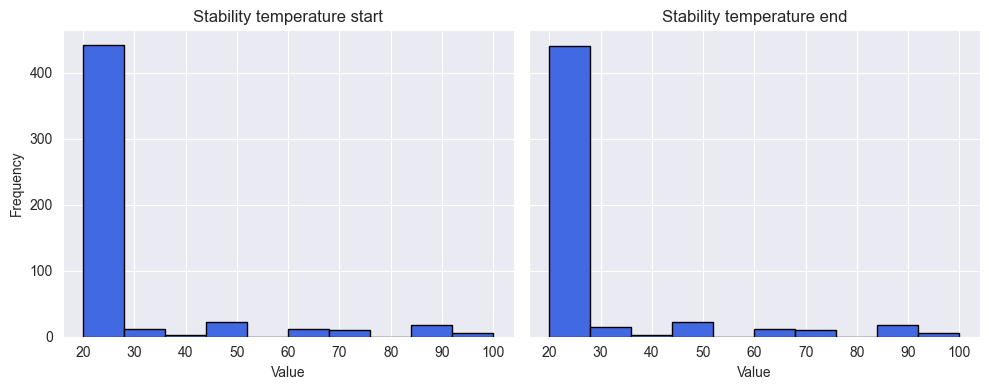

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Plot first column
axes[0].hist(df_main["stability_temperature_start"].dropna(), bins=10, color="royalblue", edgecolor="black")
axes[0].set_title("Stability temperature start")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Plot second column
axes[1].hist(df_main["stability_temperature_end"].dropna(), bins=10, color="royalblue", edgecolor="black")
axes[1].set_title("Stability temperature end")
axes[1].set_xlabel("Value")

plt.tight_layout()
plt.show()

In [41]:
df_main = df_main.dropna(subset=["stability_temperature_start", "stability_temperature_end"])
df_main

,composition_long_form,cell_architecture,ETL_stack_sequence,backcontact_stack_sequence,stability_time_total_exposure,stability_light_intensity,stability_protocol,PCE_initial,cell_area_measured,encapsulation,...,C_1_coef,C_2_coef,dimension_list_of_layers,r_A,r_B,r_C,tolerance_factor,octahedral_factor,stability_temperature_start,stability_temperature_end
0,MAPbI3,nip,TiO2-c,Au,480.0,0.0,ISOS-D-1,61.0,0.04,0.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
1,MAPbI3,nip,TiO2-c,Au,480.0,0.0,ISOS-D-1,78.0,0.04,0.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
4,MAPbI3,nip,TiO2-c,Au,1008.0,0.0,ISOS-D-1,71.6,0.10,0.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
5,MAPbI3,nip,TiO2-c,Au,1008.0,0.0,ISOS-D-1,60.4,0.10,0.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
6,MAPbI3,nip,TiO2-c | TiO2-mp,Au,168.0,0.0,ISOS-D-1,50.0,0.16,0.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,MAPb1.0I3,nip,TiO2-c,Au,60.0,100.0,ISOS-L-1,30.0,0.10,0.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
2116,MAPb1.0I3,nip,TiO2-c,Au,120.0,100.0,ISOS-L-1,60.0,0.10,1.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,25.0,25.0
2117,MAPb1.0I3,nip,TiO2-c,Au,60.0,100.0,ISOS-L-1,60.0,0.10,1.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,50.0,50.0
2118,MAPb1.0I3,nip,TiO2-c,Au,60.0,100.0,ISOS-L-1,60.0,0.10,1.0,...,3.0,NaN,3.0,0.723333,0.396667,2.2,0.796062,0.180303,70.0,70.0


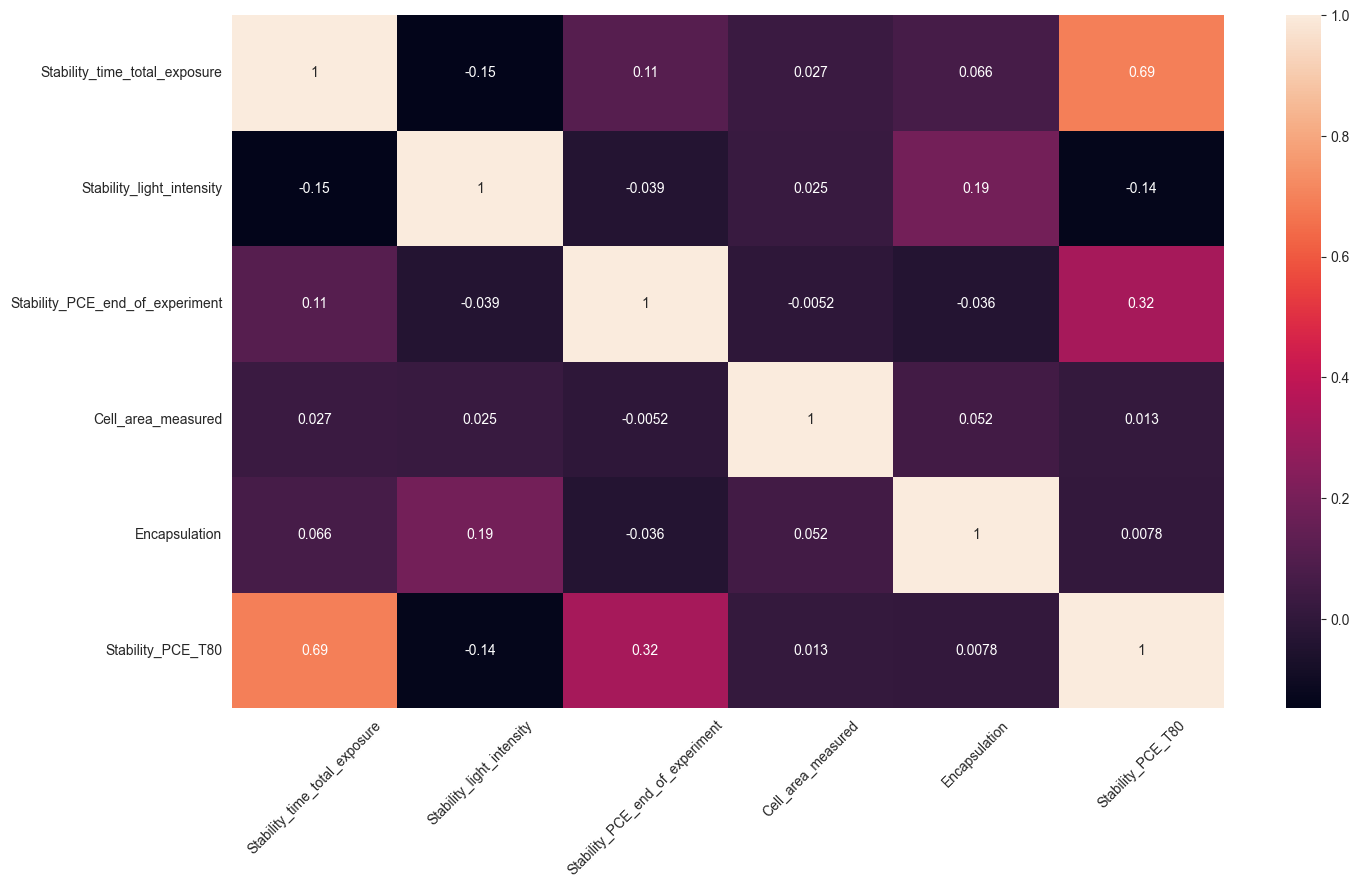

In [42]:
# check correlation for numerical columns
num_columns = [col for col in df.columns if df[col].dtype != np.object_]
plt.figure(figsize=(16, 9))
sns.heatmap(df[num_columns].corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

#### Build model

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from xgboost import XGBRegressor

X, y = df_main.drop(columns=["PCE_T80"]), df_main["PCE_T80"].values

numerical_features = [col for col in X.columns if X[col].dtype != np.object_]
categorical_features = [col for col in X.columns if col not in numerical_features]

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['stability_time_total_exposure',
                                                   'stability_light_intensity',
                                                   'PCE_initial',
                                                   'cell_area_measured',
                                                   'encapsulation', 'band_gap',
                                                   'A_1_coef', 'A_2_coef',
                                                   'B_1_coef', 'C_1_coef',
                                                   'C_2_coef',
                                                   'dimension_list_of_layers',
                                                   'r_A', 'r_B', 'r_C',
                                                   'tolerance...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [54]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "regressor__n_estimators": [3400, 3500, 3700, 4000],
    "regressor__learning_rate": [0.08, 0.09, 0.1, 0.11],
    "regressor__min_child_weight": [0.08, 0.09, 0.1, 0.11],
    "regressor__gamma": [0.005, 0.006, 0.007, 0.01, 0.02],
    "regressor__subsample": [0.1, 0.2, 0.3, 0.4],
    "regressor__colsample_bytree": [0.001, 0.002, 0.003, 0.1],
}

grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

print("Starting GridSearchCV... This may take a while.")
grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# (The grid_search object is now our "model")
print("\n--- GridSearch Complete ---")
print(f"Best RMSE Score: {rmse:.4f}")
print(f"Best R2: {r2:.4f}")
print(f"Params: {grid_search.best_params_}")

Starting GridSearchCV... This may take a while.
Fitting 5 folds for each of 5120 candidates, totalling 25600 fits

--- GridSearch Complete ---
Best RMSE Score: 37.1596
Best Parameters: 0.9847
Params: {'regressor__colsample_bytree': 0.1, 'regressor__gamma': 0.02, 'regressor__learning_rate': 0.09, 'regressor__min_child_weight': 0.08, 'regressor__n_estimators': 4000, 'regressor__subsample': 0.3}


In [55]:
model_pipeline = grid_search.best_estimator_
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("\n--- Fit result of model ---")
print(f"Best RMSE Score: {rmse:.4f}")
print(f"Best R2: {r2:.4f}")
model_pipeline


--- Fit result of model ---
Best RMSE Score: 37.1596
Best R2: 0.9847


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['stability_time_total_exposure',
                                                   'stability_light_intensity',
                                                   'PCE_initial',
                                                   'cell_area_measured',
                                                   'encapsulation', 'band_gap',
                                                   'A_1_coef', 'A_2_coef',
                                                   'B_1_coef', 'C_1_coef',
                                                   'C_2_coef',
                                                   'dimension_list_of_layers',
                                                   'r_A', 'r_B', 'r_C',
                                                   'tolerance...
                              feature_types=None, gamma=0.02, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.09,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=0.08, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=4000, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

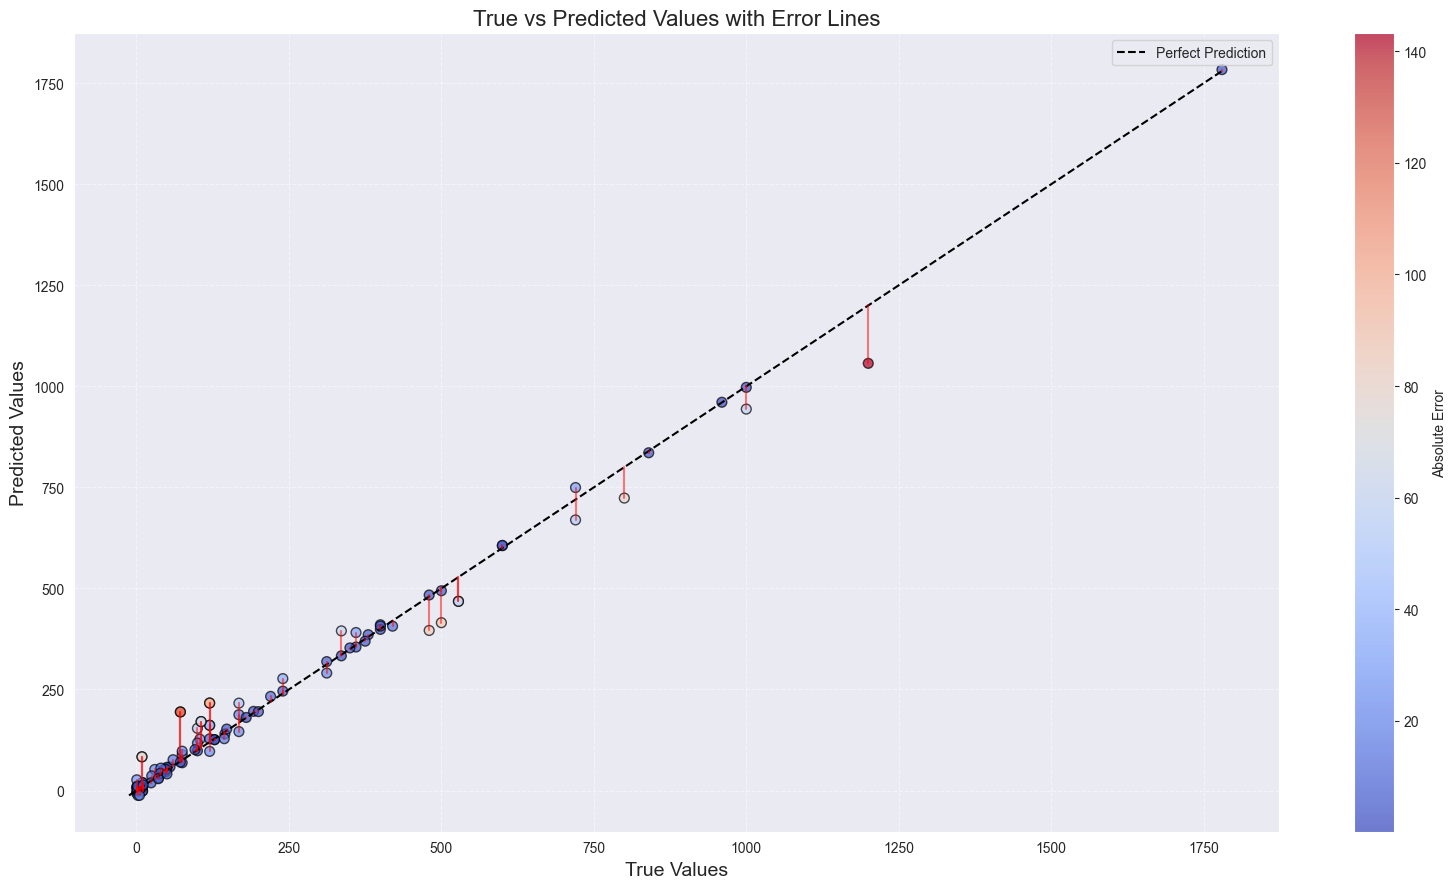

In [57]:
errors = np.abs(y_test - y_pred)

plt.figure(figsize=(16, 9))
scatter = plt.scatter(y_test, y_pred, c=errors, cmap='coolwarm', s=50, alpha=0.7, edgecolor='k')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]], 'r-', alpha=0.5)

plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('True vs Predicted Values with Error Lines', fontsize=16)
plt.colorbar(scatter, label='Absolute Error')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [58]:
from joblib import dump

dump(model_pipeline, "../ml_models/pce_t80_model.joblib")

['../ml_models/pce_t80_model.joblib']